In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('learningSet.csv')

C:\Users\etak6\AppData\Local\Temp\ipykernel_6156\3673836359.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


# Lab | Revisiting Machine Learning Case Study

### 0. Creating categorical and numerical data

In [3]:
# Creating X/y split, to separete 
Y = data[['TARGET_B', 'TARGET_D']] 
X = data.drop(['TARGET_B', 'TARGET_D'], axis=1) 

In [4]:
numerical = X.select_dtypes(np.number)
numerical.head()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9504.0,9503.0,9502.0,9501.0,9411.0,9411.0,9410.0,9409.0,9407.0,9406.0,27,9702,74,6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9512.0,NaN,NaN,NaN,9507.0,9505.0,9505.0,9503.0,NaN,NaN,NaN,NaN,NaN,9408.0,9406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,10.0,11.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,11.0,9.0,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,4

In [5]:
categorical = X.select_dtypes(object)
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,,,0,,,,,XXXX,T2,36,,,,,,,F,,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,XXXX,S1,14,E,H,,,,M,M,3,,,,2,,,,,,,,,,,,,,,,,,,,,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,,,,L1E,,,N1E,N1E,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,XXXX,R2,43,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,,S4F,S4F,S4F,S4F,S4F,S4F,,S4D,S4D,,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,XXXX,R2,44,E,U,,,,,F,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,XXXX,S2,16,E,H,,,,,F,3,,12,,,,,Y,Y,,,,Y,,,Y,,Y,,Y,,Y,,3,,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A


### 1. Check for null values in all the columns

In [6]:
categorical.isna().sum()*100/len(categorical)

OSOURCE     0.000000
STATE       0.000000
ZIP         0.000000
MAILCODE    0.000000
PVASTATE    0.000000
              ...   
RFA_2A      0.000000
MDMAUD_R    0.000000
MDMAUD_F    0.000000
MDMAUD_A    0.000000
GEOCODE2    0.138347
Length: 74, dtype: float64

In [7]:
nulls_percent_cat_df = pd.DataFrame(categorical.isna().sum()*100/len(categorical)).reset_index()
nulls_percent_cat_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_cat_df

,column_name,nulls_percentage
0,OSOURCE,0.000000
1,STATE,0.000000
2,ZIP,0.000000
3,MAILCODE,0.000000
4,PVASTATE,0.000000
...,...,...
69,RFA_2A,0.000000
70,MDMAUD_R,0.000000
71,MDMAUD_F,0.000000
72,MDMAUD_A,0.000000


In [8]:
# Checking which columns have some null values
nulls_percent_cat_df[nulls_percent_cat_df['nulls_percentage'] != 0]

,column_name,nulls_percentage
73,GEOCODE2,0.138347


In [9]:
# -> 64 categorical columns have some null values.
# In the next steps there will be done some cleaning

### 2. 
Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:

- OSOURCE - symbol definitions not provided, too many categories
- ZIP - we are including state already

In [10]:
drop_list = []

In [11]:
drop_list = ["OSOURCE", "ZIP"]

### 3. Identify columns that have over 50% missing values.

In [12]:
# treshold > 50%
# columns above treshold ->:  columns_above_threshold

In [13]:
columns_above_threshold_cat = nulls_percent_cat_df[nulls_percent_cat_df['nulls_percentage']>50]
columns_above_threshold_cat['column_name']

Series([], Name: column_name, dtype: object)

### 4. Remove those columns from the dataframe

In [14]:
# There are no categorical columns with more than 50% missing values, so there is nothing to drop at this point.
# Probably there will need to be done other cleaning first.

### 5. Perform all of the cleaning processes from the Lesson.

In [15]:
# Filling empty spaces with NaN
categorical = categorical.apply(lambda x: x.replace(" ", np.NaN))

In [16]:
nulls_percent_cat_df = pd.DataFrame(categorical.isna().sum()*100/len(categorical)).reset_index()
nulls_percent_cat_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_cat_df

,column_name,nulls_percentage
0,OSOURCE,0.972624
1,STATE,0.000000
2,ZIP,0.000000
3,MAILCODE,98.533727
4,PVASTATE,98.471890
...,...,...
69,RFA_2A,0.000000
70,MDMAUD_R,0.000000
71,MDMAUD_F,0.000000
72,MDMAUD_A,0.000000


In [17]:
# Now we see,that there are much more columns with more than 50% values

#### Removing columns with null values greater than a 50% threshold (condition from the lab)

In [18]:
columns_above_threshold_cat = nulls_percent_cat_df[nulls_percent_cat_df['nulls_percentage']>50]
columns_above_threshold_cat['column_name']

3     MAILCODE
4     PVASTATE
6     RECINHSE
7        RECP3
8      RECPGVG
9     RECSWEEP
15     CHILD03
16     CHILD07
17     CHILD12
18     CHILD18
21       SOLP3
22       SOLIH
23       MAJOR
24     GEOCODE
25    COLLECT1
26    VETERANS
27       BIBLE
28       CATLG
29       HOMEE
30        PETS
31      CDPLAY
32      STEREO
33    PCOWNERS
34       PHOTO
35      CRAFTS
36      FISHER
37    GARDENIN
38       BOATS
39      WALKER
40    KIDSTUFF
41       CARDS
42      PLATES
43     LIFESRC
44    PEPSTRFL
58      RFA_15
63      RFA_20
66      RFA_23
Name: column_name, dtype: object

In [19]:
print(len(columns_above_threshold_cat['column_name']))

37


In [20]:
drop_cat_col_above_50 = list(columns_above_threshold_cat['column_name'])
print(drop_cat_col_above_50)

['MAILCODE', 'PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'SOLP3', 'SOLIH', 'MAJOR', 'GEOCODE', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC', 'PEPSTRFL', 'RFA_15', 'RFA_20', 'RFA_23']


In [21]:
# Adding elements to the list drop_list
drop_list2 = drop_list + drop_cat_col_above_50
len(drop_list2)

39

In [22]:
drop_list = drop_list2
len(drop_list)

# drop_list has now 39 elements
# I am still not dropping columns, as I will revise at the end what is to drop and what not. 

39

In [23]:
# sorted(drop_list)

#### other cleaning from the class

In [24]:
# important columns to keep (after disscussin e.g. with menager):
important_col = ['WEALTH1', 'WEALTH2', 'VETERANS', 'SOLIH']

# They are not in the list to drop at the moment

In [25]:
# for item in important_col:
#     drop_list.remove(item)  
# print(drop_list)

In [26]:
categorical['MAILCODE'].value_counts(dropna=False)

# Previously we filled empty values " " with NaN.
# After reviewing the meaning of columns " " should have been replaced with A.

MAILCODE
NaN    94013
B       1399
Name: count, dtype: int64

In [27]:
categorical['MAILCODE'] = categorical['MAILCODE'].fillna("A")
categorical['MAILCODE'].value_counts(dropna=False)

MAILCODE
A    94013
B     1399
Name: count, dtype: int64

In [28]:
categorical['MAILCODE'].unique()
# Column "MAILCODE" should not be removed anymore!

array(['A', 'B'], dtype=object)

In [29]:
col_not_drop = []
col_not_drop = ["MAILCODE"]

In [30]:
print(data['VETERANS'].unique())
categorical["VETERANS"].unique()

# Here again the blanks were filled up with nan. 
# After reviewing the columns meaning blanks should have been filled up with "N" meaning No. 

[' ' 'Y']


array([nan, 'Y'], dtype=object)

In [31]:
categorical['VETERANS'] = categorical['VETERANS'].fillna("N")
categorical['VETERANS'].value_counts(dropna=False)

# -> VETERANS should not be removed further

VETERANS
N    84986
Y    10426
Name: count, dtype: int64

In [32]:
col_not_drop.append("VETERANS")

In [33]:
col_not_drop

['MAILCODE', 'VETERANS']

In [34]:
categorical['SOLIH'].unique()

array([nan, '12', '0', '2', '1', '4', '6', '3'], dtype=object)

In [35]:
# SOLIH means how many mailing can a houshold receive during a year. 
# It would be wrong to decide to fill it with a mode, because it might be that a person doesnt want mailing at all. 
# As long as we dont have any information, nan should be replaced with default alue, which is "0" here. 

In [36]:
categorical['SOLIH'] = categorical['SOLIH'].fillna("0")
categorical['SOLIH'].value_counts(dropna=False)

SOLIH
0     89508
12     5693
1        94
2        75
3        19
4        16
6         7
Name: count, dtype: int64

In [37]:
col_not_drop.append("SOLIH")

In [38]:
# categorical['STATE'].value_counts()

In [39]:
df = pd.DataFrame(categorical['STATE'].value_counts()).reset_index()

df.columns = ['state', 'count']
other_states = list(df[df['count']<2500]['state'])
other_states


def clean_state(x):
    if x in other_states:
        return 'other'
    else:
        return x

    
categorical['STATE'] = list(map(clean_state, categorical['STATE']))

In [40]:
categorical['STATE'].value_counts()

STATE
other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: count, dtype: int64

In [41]:
# Column DOMAIN
categorical['DOMAIN'].value_counts(dropna=False)

DOMAIN
R2     13623
T2     12369
S1     11503
S2      8530
C2      8264
C1      6145
C3      5280
T1      4982
R3      4809
U1      4510
U2      3254
U3      2598
NaN     2316
T3      2176
S3      1891
U4      1804
R1      1358
Name: count, dtype: int64

In [42]:
categorical['DOMAIN'].mode()

0    R2
Name: DOMAIN, dtype: object

In [43]:
# filling NaN with mode 
categorical['DOMAIN'] = categorical['DOMAIN'].fillna('R2')

In [44]:
categorical['DOMAIN_A'] = list(map(lambda x: x[0], categorical['DOMAIN']))
categorical['DOMAIN_B'] = list(map(lambda x: x[1], categorical['DOMAIN']))

categorical[['DOMAIN','DOMAIN_A','DOMAIN_B']].head()

,DOMAIN,DOMAIN_A,DOMAIN_B
0,T2,T,2
1,S1,S,1
2,R2,R,2
3,R2,R,2
4,S2,S,2


In [45]:
categorical = categorical.drop(columns=['DOMAIN'])

In [46]:
# Handling imbalanced columns

In [47]:
categorical['MAILCODE'].value_counts()

MAILCODE
A    94013
B     1399
Name: count, dtype: int64

In [48]:
# drop_list  #-> MAILCODE included

In [49]:
col_not_drop.remove("MAILCODE")

In [50]:
col_not_drop

['VETERANS', 'SOLIH']

In [51]:
drop_list.remove("VETERANS")

In [52]:
drop_list.remove("SOLIH")

In [53]:
categorical['NOEXCH'].value_counts(dropna=False)

NOEXCH
0      61203
0      33882
1        195
1         90
X         35
NaN        7
Name: count, dtype: int64

In [54]:
drop_list.append('NOEXCH')

In [55]:
categorical['MDMAUD'].value_counts()
# Most of the data is unknown, so we will remove this column

MDMAUD
XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
C2CM       24
D1CM       20
L2CM       15
L1LM        8
C1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
C5CM        3
C2MM        3
C2LM        3
D5TM        3
I1LM        3
I5CM        1
C1MM        1
I5MM        1
C5MM        1
I2MM        1
L1MM        1
L2LM        1
C5TM        1
L2TM        1
Name: count, dtype: int64

In [56]:
drop_list.append('MDMAUD')

In [57]:
# MDMAUD_R Recency code for MDMAUD  
# MDMAUD_F Frequecy code for MDMAUD  
# MDMAUD_A Donation Amount code for MDMAUD
# as we drop MDMAUD there is no need to keep those other columns.

drop_list = drop_list + ['MDMAUD_R', 'MDMAUD_F','MDMAUD_A']

In [58]:
# categorical['CLUSTER'].value_counts(dropna=False)
categorical['CLUSTER'].sort_values().unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '5', '50', '51', '52', '53', '6', '7', '8', '9', nan], dtype=object)

In [59]:
categorical['CLUSTER'].mode()

0    40
Name: CLUSTER, dtype: object

In [60]:
categorical['CLUSTER'] = categorical['CLUSTER'].fillna('40')

In [61]:
categorical['HOMEOWNR'].value_counts(dropna=False)

HOMEOWNR
H      52354
NaN    22228
U      20830
Name: count, dtype: int64

In [62]:
categorical['HOMEOWNR'] = categorical['HOMEOWNR'].fillna('N') # assumption: NAN means 'not a home owner'

In [63]:
categorical['DATASRCE'].value_counts(dropna=False)

DATASRCE
3      43549
2      23455
NaN    21280
1       7128
Name: count, dtype: int64

In [64]:
categorical['DATASRCE'] = categorical['DATASRCE'].fillna('0') # 'not found in any external data source'

In [65]:
categorical['GEOCODE2'].value_counts(dropna=False)

GEOCODE2
A      34484
B      28505
D      16580
C      15524
NaN      319
Name: count, dtype: int64

In [66]:
categorical['GEOCODE2'] = categorical['GEOCODE2'].fillna('A')

In [67]:
# Removing columns with similiar information

In [68]:
categorical['RFA_3'].value_counts()

RFA_3
A1F    21950
A1G     9184
A2F     6283
F1F     5973
A1E     5119
       ...  
S2B        2
S3C        2
A2C        1
S3B        1
N1C        1
Name: count, Length: 70, dtype: int64

In [69]:
# We will keep the column RFA_2X, as this is the recent mailing campaign. 
# We will delete rest of the columns 

for col_name in categorical.columns:
    if "RFA" in col_name:
        drop_list.append(col_name)  

In [70]:
drop_list.remove('RFA_2R')
drop_list.remove('RFA_2A')

In [74]:
categorical = categorical.drop(columns=drop_list)
categorical.head()

,STATE,CLUSTER,AGEFLAG,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,36,NaN,N,F,0,0,N,L,E,C,T,2
1,CA,14,E,H,M,3,0,N,L,G,A,S,1
2,NC,43,NaN,U,M,3,0,N,L,E,C,R,2
3,CA,44,E,U,F,3,0,N,L,E,C,R,2
4,FL,16,E,H,F,3,12,N,L,F,A,S,2


In [75]:
categorical['AGEFLAG'].value_counts()

# the column doesnt give us new informations about a target, so I will remove it.

AGEFLAG
E    57344
I     8520
Name: count, dtype: int64

In [80]:
categorical = categorical.drop(["AGEFLAG"], axis=1)
categorical.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,36,N,F,0,0,N,L,E,C,T,2
1,CA,14,H,M,3,0,N,L,G,A,S,1
2,NC,43,U,M,3,0,N,L,E,C,R,2
3,CA,44,U,F,3,0,N,L,E,C,R,2
4,FL,16,H,F,3,12,N,L,F,A,S,2


### 6. Column "GENDER"
Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest

- Note that there are a few null values in the column. We will first replace those null values using the code below:

- print(categorical['GENDER'].value_counts())
- categorical['GENDER'] = categorical['GENDER'].fillna('F')

In [81]:
categorical["GENDER"].value_counts()

GENDER
F    51277
M    39094
U     1715
J      365
C        2
A        2
Name: count, dtype: int64

In [82]:
categorical["GENDER"].isna().sum()

2957

In [83]:
categorical['GENDER'] = categorical['GENDER'].fillna('F')

In [84]:
categorical["GENDER"].value_counts()

GENDER
F    54234
M    39094
U     1715
J      365
C        2
A        2
Name: count, dtype: int64

In [85]:
categorical['GENDER'].replace({'U': 'other', 'J': 'other', 'C': 'other', 'A': 'other'}, inplace=True)

In [86]:
categorical["GENDER"].value_counts()

GENDER
F        54234
M        39094
other     2084
Name: count, dtype: int64

In [90]:
categorical.to_csv('categorical_clean.csv', index=False)

In [91]:
Y.to_csv('target.csv')

## Lab | Feature engineering

### Instructions
Again go through all of the Numerical columns and apply the techniques that were performed in the lesson

Then we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

- Check for null values in the numerical columns.
- After going through the lesson techniques there should only be a few columns left with NaN values to clean.
- Use appropriate methods to clean the columns which still contain NaN values.
- Use appropriate EDA technique where ever necessary.

#### Part from the class

In [87]:
numerical.head()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9504.0,9503.0,9502.0,9501.0,9411.0,9411.0,9410.0,9409.0,9407.0,9406.0,27,9702,74,6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9512.0,NaN,NaN,NaN,9507.0,9505.0,9505.0,9503.0,NaN,NaN,NaN,NaN,NaN,9408.0,9406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,10.0,11.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,11.0,9.0,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,4

In [88]:
numerical.shape

(95412, 405)

In [89]:
df_n = pd.DataFrame(numerical.isna().sum()).reset_index()
df_n.columns = ['column_name', 'nulls']
df_n[df_n['nulls']>0]

,column_name,nulls
3,AGE,23665
4,NUMCHLD,83026
5,INCOME,21286
6,WEALTH1,44732
8,MBCRAFT,52854
...,...,...
386,RAMNT_23,87553
387,RAMNT_24,77674
398,NEXTDATE,9973
399,TIMELAG,9973


In [92]:
# Removing  ADATE_ columns (besides ADATE_2 as it is the recent one)
drop_list_num = []

In [93]:
for col_name in numerical.columns:
    if "ADATE" in col_name:
        drop_list_num.append(col_name) 

In [95]:
# drop_list_num

In [96]:
numerical['AGE'].value_counts(dropna=False)

AGE
NaN     23665
50.0     1930
76.0     1885
72.0     1813
68.0     1809
        ...  
9.0         1
6.0         1
10.0        1
8.0         1
15.0        1
Name: count, Length: 97, dtype: int64

In [103]:
numerical['AGE'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  6.,  7.,  8.,  9., 10., 11., 13., 14., 15.,
       16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
       29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
       42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54.,
       55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67.,
       68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80.,
       81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93.,
       94., 95., 96., 97., 98., nan])

In [104]:
numerical['AGE'].median()

62.0

C:\Users\etak6\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


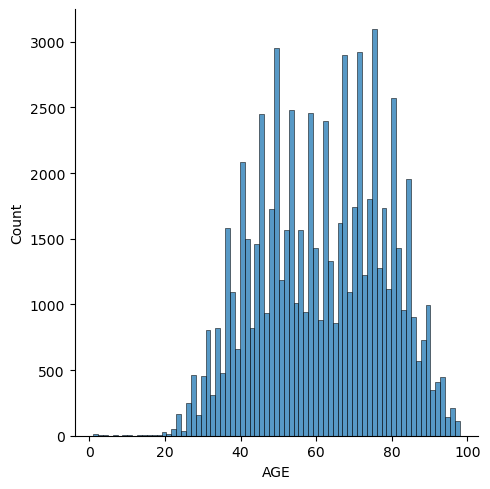

In [97]:
sns.displot(numerical['AGE'])
plt.show()

In [105]:
numerical['AGE'] = numerical["AGE"].fillna(62.0)

C:\Users\etak6\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


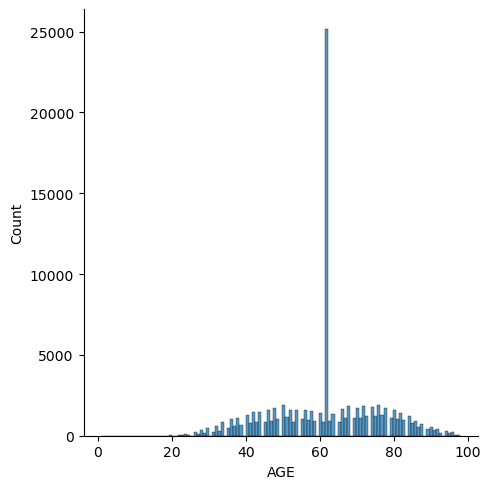

In [106]:
sns.displot(numerical['AGE'])
plt.show()

C:\Users\etak6\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


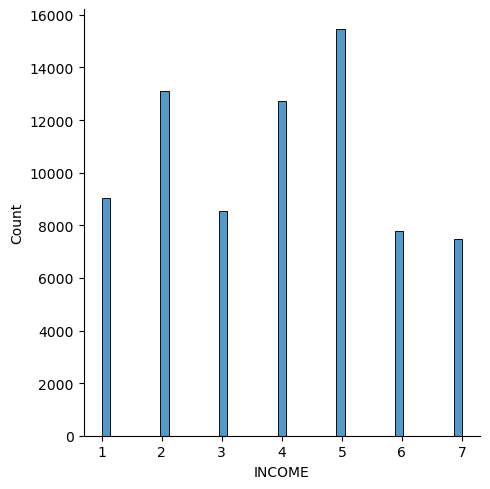

In [107]:
sns.displot(numerical['INCOME']) 
plt.show()

In [108]:
# looks like the variable is actually categorical. We can verify it by using value_counts()
print(numerical['INCOME'].value_counts(dropna=False))
numerical['INCOME'] = numerical['INCOME'].astype(object)   # changing to object

INCOME
NaN    21286
5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: count, dtype: int64


In [109]:
numerical['INCOME'] = numerical['INCOME'].fillna(5.0) # Replacing the null values with the most represented category

C:\Users\etak6\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


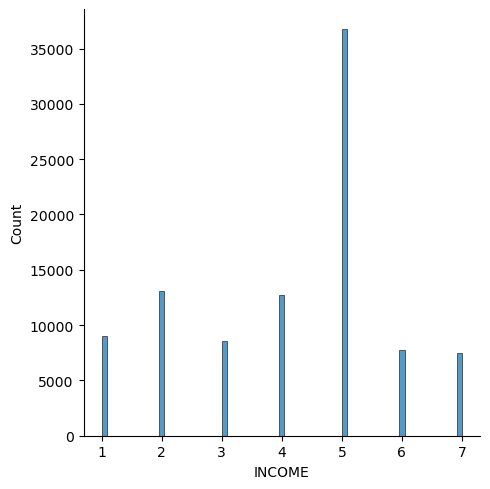

In [110]:
sns.displot(numerical['INCOME']) 
plt.show()

C:\Users\etak6\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


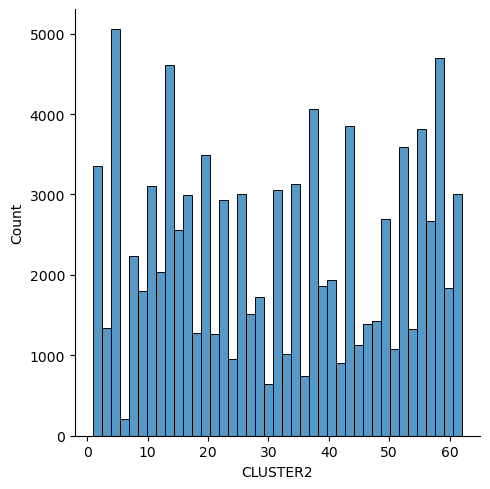

In [111]:
sns.displot(numerical[numerical['CLUSTER2'].isna()==False]['CLUSTER2']) 
plt.show()

In [112]:
numerical['CLUSTER2'].value_counts(dropna=False)

CLUSTER2
13.0    3466
5.0     3154
57.0    2666
59.0    2653
15.0    2559
        ... 
46.0     644
29.0     569
40.0     369
6.0      211
NaN      132
Name: count, Length: 63, dtype: int64

In [116]:
# Possible ways:
# 1. fill up with mean
# 2. fill up with median
# 3. fill up with 0
# I decide for 2 -> median

numerical['CLUSTER2'].median()

32.0

In [117]:
numerical['CLUSTER2'] = numerical['CLUSTER2'].fillna(32.0)

C:\Users\etak6\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


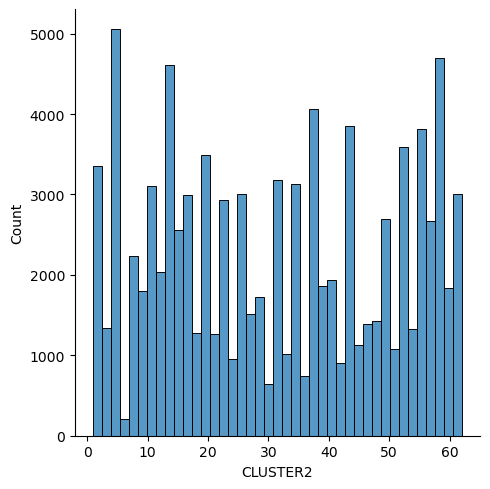

In [119]:
sns.displot(numerical['CLUSTER2']) 
plt.show()

In [127]:
numerical.WEALTH2.value_counts(dropna=False)

WEALTH2
NaN    43823
9.0     6523
8.0     5975
7.0     5684
6.0     5497
5.0     5351
4.0     5074
3.0     5046
2.0     4971
1.0     4191
0.0     3277
Name: count, dtype: int64

C:\Users\etak6\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


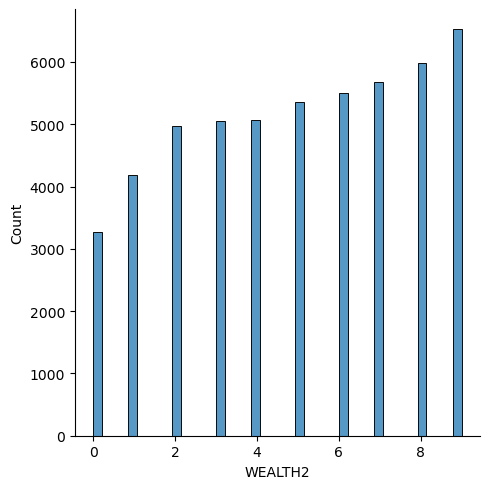

In [128]:
sns.displot(numerical['WEALTH2']) 
plt.show()

In [129]:
numerical['WEALTH2'].median()

5.0

In [130]:
numerical['WEALTH2'] = numerical['WEALTH2'].astype('object')
numerical['WEALTH2'] = numerical['WEALTH2'].fillna('5.0') # median

C:\Users\etak6\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


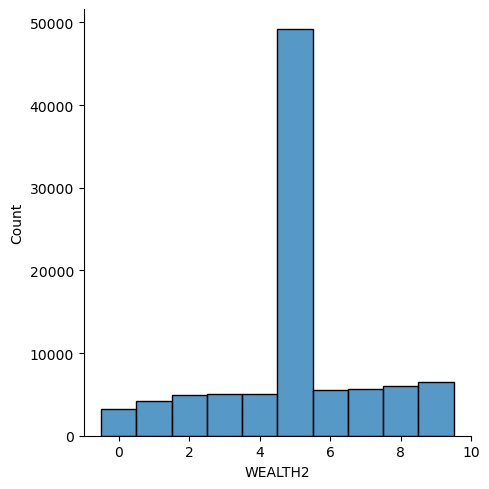

In [132]:
sns.displot(numerical['WEALTH2']) 
plt.show()

C:\Users\etak6\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


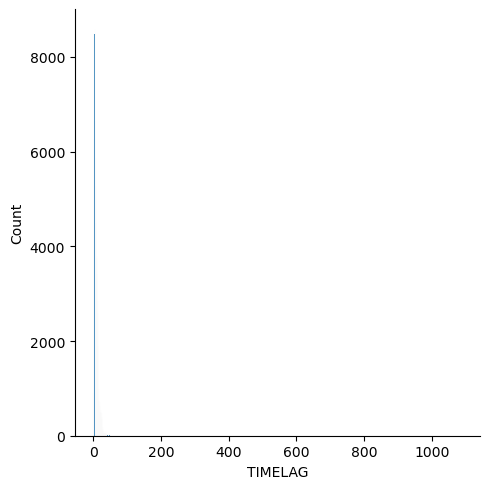

In [133]:
sns.displot(numerical['TIMELAG']) 
plt.show()

In [134]:
numerical.TIMELAG.value_counts(dropna=False)

TIMELAG
NaN       9973
5.0       8584
4.0       8490
3.0       8485
6.0       6648
          ... 
89.0         1
1044.0       1
53.0         1
442.0        1
1088.0       1
Name: count, Length: 69, dtype: int64

In [135]:
numerical['TIMELAG'] = numerical['TIMELAG'].fillna(0.0)

C:\Users\etak6\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


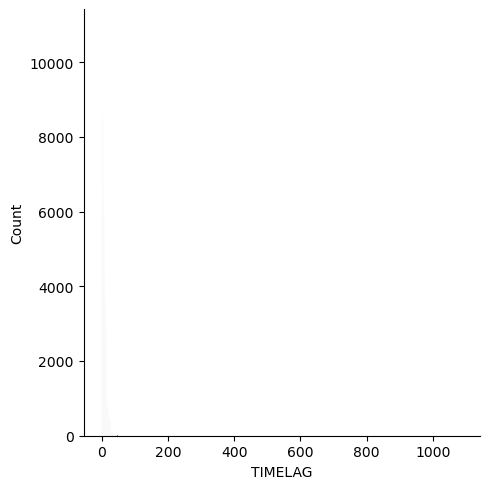

In [137]:
sns.displot(numerical['TIMELAG']) 
plt.show()

#### Part from the lab

In [139]:
numerical = numerical.drop(columns=drop_list_num)
numerical.head()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,5.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9512.0,NaN,NaN,NaN,9507.0,9505.0,9505.0,9503.0,NaN,NaN,NaN,NaN,NaN,9408.0,9406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,10.0,11.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,11.0,9.0,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,

In [140]:
numerical.isna().sum()

ODATEDW         0
TCODE           0
DOB             0
AGE             0
NUMCHLD     83026
            ...  
AVGGIFT         0
CONTROLN        0
HPHONE_D        0
RFA_2F          0
CLUSTER2        0
Length: 381, dtype: int64

In [141]:
df_n = pd.DataFrame(numerical.isna().sum()).reset_index()
df_n.columns = ['column_name', 'nulls']
df_n[df_n['nulls']>0]

,column_name,nulls
4,NUMCHLD,83026
6,WEALTH1,44732
8,MBCRAFT,52854
9,MBGARDEN,52854
10,MBBOOKS,52854
...,...,...
360,RAMNT_21,85899
361,RAMNT_22,74539
362,RAMNT_23,87553
363,RAMNT_24,77674


#### Identify numerical columns that have over 50% missing values (and removing them)

In [ ]:
# Identify columns that have over 50% missing values.

# treshold > 50%
# columns above treshold ->:  columns_above_threshold

In [143]:
nulls_percent_num_df = pd.DataFrame(numerical.isna().sum()*100/len(numerical)).reset_index()
nulls_percent_num_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_num_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,TCODE,0.000000
2,DOB,0.000000
3,AGE,0.000000
4,NUMCHLD,87.018404
...,...,...
376,AVGGIFT,0.000000
377,CONTROLN,0.000000
378,HPHONE_D,0.000000
379,RFA_2F,0.000000


In [144]:
columns_above_threshold_num = nulls_percent_num_df[nulls_percent_num_df['nulls_percentage']>50]
columns_above_threshold_num['column_name']

4       NUMCHLD
8       MBCRAFT
9      MBGARDEN
10      MBBOOKS
11     MBCOLECT
12      MAGFAML
13       MAGFEM
14      MAGMALE
15     PUBGARDN
16     PUBCULIN
17      PUBHLTH
18     PUBDOITY
19     PUBNEWFN
20     PUBPHOTO
21       PUBOPP
320     RDATE_3
321     RDATE_4
322     RDATE_5
323     RDATE_6
324     RDATE_7
325     RDATE_8
326     RDATE_9
327    RDATE_10
328    RDATE_11
329    RDATE_12
330    RDATE_13
331    RDATE_14
332    RDATE_15
333    RDATE_16
334    RDATE_17
335    RDATE_18
336    RDATE_19
337    RDATE_20
338    RDATE_21
339    RDATE_22
340    RDATE_23
341    RDATE_24
342     RAMNT_3
343     RAMNT_4
344     RAMNT_5
345     RAMNT_6
346     RAMNT_7
347     RAMNT_8
348     RAMNT_9
349    RAMNT_10
350    RAMNT_11
351    RAMNT_12
352    RAMNT_13
353    RAMNT_14
354    RAMNT_15
355    RAMNT_16
356    RAMNT_17
357    RAMNT_18
358    RAMNT_19
359    RAMNT_20
360    RAMNT_21
361    RAMNT_22
362    RAMNT_23
363    RAMNT_24
Name: column_name, dtype: object

In [146]:
numerical["RAMNT_3"].value_counts(dropna=False)

RAMNT_3
NaN     95170
10.0       37
5.0        31
7.0        21
20.0       20
15.0       18
3.0        15
25.0       13
8.0        12
12.0        9
9.0         9
6.0         8
14.0        8
50.0        6
4.0         6
2.0         5
11.0        4
16.0        3
21.0        2
23.0        2
17.0        2
30.0        2
13.0        2
19.0        1
40.0        1
18.0        1
22.0        1
3.5         1
35.0        1
29.0        1
Name: count, dtype: int64

In [147]:
numerical["NUMCHLD"].value_counts(dropna=False)

# Here I assume, that NaN means "no children." This is the group of 87% of all values. 
# But because I am not sure about my assumption, and the description doesnt provide the information, I decide to drop this column.

NUMCHLD
NaN    83026
1.0     7792
2.0     3110
3.0     1101
4.0      316
5.0       59
6.0        7
7.0        1
Name: count, dtype: int64

In [154]:
# columns_above_threshold_num

In [ ]:
# RAMNT_4 till RAMNT_24 : All those columns  will be removed, as they show the gift for the history
# RAMNT_3 will also be removed, as it contains too much NaN
# RDATE: those all features are also not needed
# After revising all those columns can be dropped as well. 

In [155]:
col_num_above_treshold = []

In [156]:
col_num_above_treshold = list(columns_above_threshold_num['column_name'])
print(col_num_above_treshold)

['NUMCHLD', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24']


In [159]:
numerical = numerical.drop(columns=col_num_above_treshold)
numerical.shape

(95412, 322)

In [160]:
df_n = pd.DataFrame(numerical.isna().sum()).reset_index()
df_n.columns = ['column_name', 'nulls']
df_n[df_n['nulls']>0]

,column_name,nulls
5,WEALTH1,44732
135,MSA,132
136,ADI,132
137,DMA,132
315,NEXTDATE,9973


In [161]:
numerical["WEALTH1"].value_counts(dropna=False)

WEALTH1
NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: count, dtype: int64

C:\Users\etak6\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


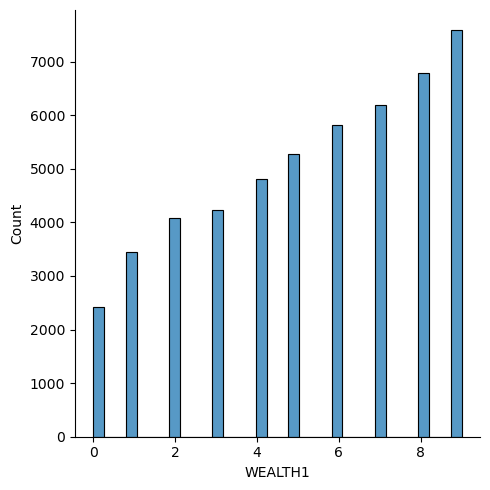

In [163]:
sns.displot(numerical['WEALTH1']) 
plt.show()

In [165]:
numerical["WEALTH1"].median()

6.0

In [168]:
numerical['WEALTH1'] = numerical['WEALTH1'].fillna('6.0') # filling up with median 6.0

In [170]:
numerical["WEALTH1"].value_counts(dropna=False)

WEALTH1
6.0    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: count, dtype: int64

In [172]:
numerical['WEALTH1'] = numerical['WEALTH1'].astype(str)

C:\Users\etak6\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


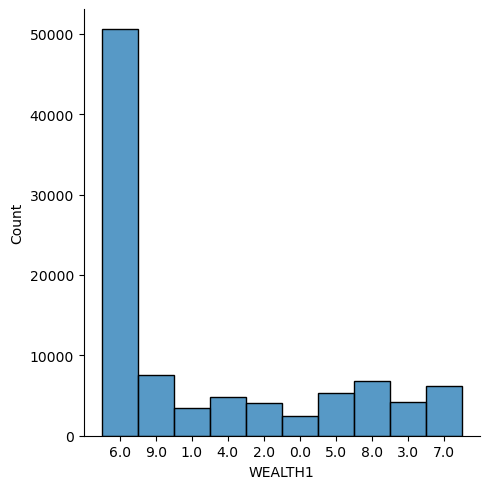

In [175]:
sns.displot(numerical['WEALTH1']) 
plt.show()

In [178]:
numerical["MSA"].value_counts(dropna=False)

# there is no exact description what this column means

MSA
0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: count, Length: 299, dtype: int64

In [210]:
numerical["MSA"].sort_values().unique()

array([   0.,   40.,   80.,  120.,  160.,  200.,  220.,  320.,  380.,
        440.,  450.,  460.,  480.,  500.,  520.,  560.,  600.,  640.,
        680.,  720.,  733.,  743.,  760.,  840.,  860.,  870.,  875.,
        880.,  920.,  960., 1000., 1010., 1020., 1040., 1080., 1123.,
       1125., 1145., 1150., 1240., 1260., 1280., 1303., 1320., 1350.,
       1360., 1400., 1440., 1480., 1520., 1540., 1560., 1580., 1600.,
       1620., 1640., 1660., 1680., 1720., 1740., 1760., 1800., 1840.,
       1880., 1920., 1950., 1960., 2000., 2020., 2030., 2040., 2080.,
       2120., 2160., 2180., 2200., 2240., 2281., 2290., 2320., 2330.,
       2340., 2400., 2440., 2520., 2560., 2580., 2620., 2640., 2650.,
       2655., 2670., 2680., 2700., 2710., 2720., 2750., 2760., 2800.,
       2840., 2880., 2900., 2920., 2960., 2975., 2980., 2985., 2995.,
       3000., 3040., 3060., 3080., 3120., 3150., 3160., 3180., 3200.,
       3240., 3283., 3285., 3290., 3320., 3350., 3360., 3400., 3440.,
       3480., 3500.,

C:\Users\etak6\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


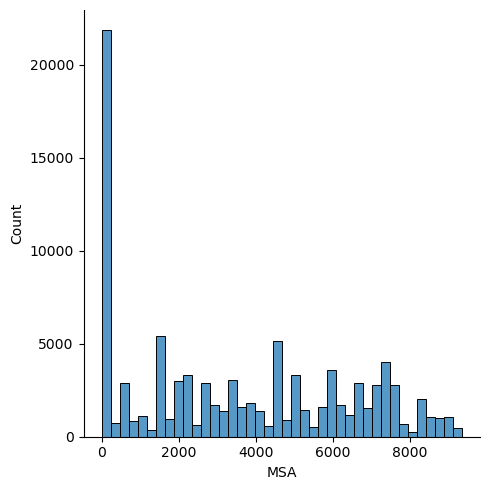

In [206]:
sns.displot(numerical['MSA']) 
plt.show()

In [208]:
numerical["MSA"].median()

3350.0

In [209]:
numerical["MSA"].mean()

3527.744101595298

In [211]:
# np.ceil -> rounding up
numerical['MSA'] = numerical['MSA'].fillna(np.ceil(np.mean(numerical['MSA'])))

In [182]:
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,5.0,6.0,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,62.0,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,1

In [183]:
numerical['WEALTH1'] = numerical['WEALTH1'].fillna(0.0) # filling with the median

In [184]:
numerical["ADI"].value_counts(dropna=False)

# there is no exact description what this column means

ADI
13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: count, Length: 205, dtype: int64

In [189]:
numerical["ADI"].sort_values().unique()

array([  0.,   3.,   9.,  11.,  13.,  15.,  17.,  19.,  21.,  25.,  29.,
        31.,  33.,  35.,  39.,  43.,  45.,  47.,  51.,  53.,  55.,  57.,
        59.,  61.,  63.,  65.,  67.,  69.,  71.,  73.,  75.,  77.,  83.,
        85.,  87.,  89.,  91.,  93.,  95., 103., 105., 107., 109., 111.,
       113., 115., 117., 119., 121., 123., 127., 129., 131., 133., 135.,
       139., 140., 141., 143., 145., 147., 149., 151., 153., 157., 159.,
       161., 165., 173., 175., 177., 179., 181., 183., 185., 187., 195.,
       197., 199., 201., 203., 205., 207., 209., 211., 213., 215., 217.,
       219., 221., 227., 229., 231., 233., 235., 237., 241., 243., 245.,
       247., 249., 251., 253., 255., 257., 261., 263., 265., 269., 271.,
       273., 275., 277., 279., 281., 283., 285., 287., 291., 293., 295.,
       297., 299., 301., 303., 305., 307., 313., 315., 317., 319., 321.,
       323., 325., 327., 329., 331., 335., 337., 339., 342., 345., 351.,
       353., 355., 357., 359., 361., 363., 367., 37

C:\Users\etak6\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


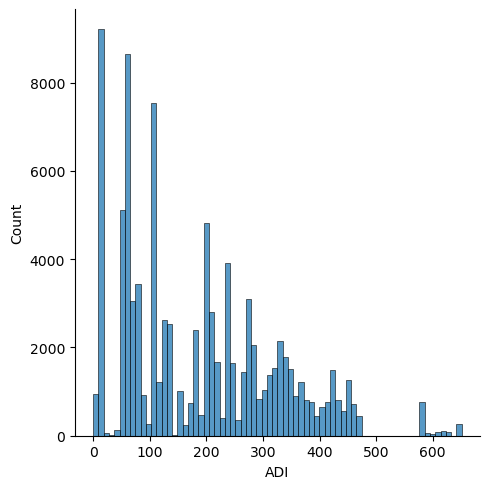

In [188]:
sns.displot(numerical['ADI']) 
plt.show()

In [186]:
numerical["ADI"].median()

175.0

In [187]:
numerical["ADI"].mean()

187.35640218303945

In [190]:
numerical['ADI'] = numerical['ADI'].fillna(175.0) # filling with the median

In [191]:
numerical["DMA"].value_counts(dropna=False)

# there is no exact description what this column means

DMA
803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: count, Length: 207, dtype: int64

In [192]:
numerical["DMA"].sort_values().unique()

array([  0., 500., 501., 502., 503., 504., 505., 506., 507., 508., 509.,
       510., 511., 512., 513., 514., 515., 516., 517., 518., 519., 520.,
       521., 522., 523., 524., 525., 527., 528., 529., 530., 531., 532.,
       533., 534., 535., 536., 537., 538., 539., 540., 541., 542., 543.,
       544., 545., 546., 547., 548., 549., 550., 551., 552., 553., 554.,
       555., 556., 557., 560., 561., 563., 564., 565., 566., 567., 569.,
       570., 571., 573., 574., 575., 577., 581., 582., 583., 584., 588.,
       592., 598., 600., 602., 603., 604., 605., 606., 609., 610., 611.,
       612., 613., 616., 617., 618., 619., 620., 622., 623., 624., 625.,
       626., 627., 628., 630., 631., 632., 633., 634., 635., 636., 637.,
       638., 639., 640., 641., 642., 643., 644., 646., 647., 648., 649.,
       650., 651., 652., 656., 657., 658., 659., 661., 662., 669., 670.,
       671., 673., 675., 676., 678., 679., 682., 686., 687., 691., 692.,
       693., 698., 702., 705., 709., 710., 711., 71

C:\Users\etak6\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


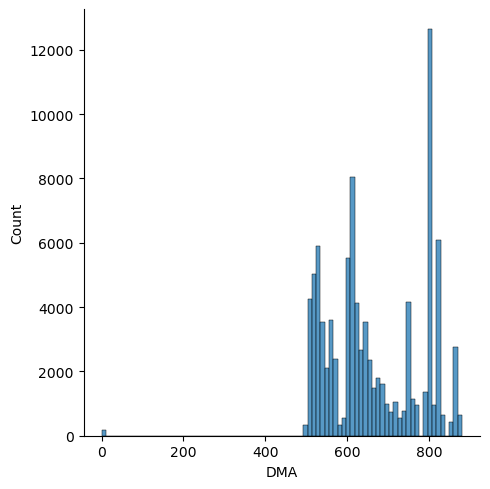

In [194]:
sns.displot(numerical['DMA']) 
plt.show()

In [195]:
numerical["DMA"].median()

635.0

In [196]:
numerical["DMA"].mean()

664.0040722082284

In [197]:
# np.floor -> rounding
numerical['DMA'] = numerical['DMA'].fillna(np.floor(np.mean(numerical['DMA'])))

C:\Users\etak6\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


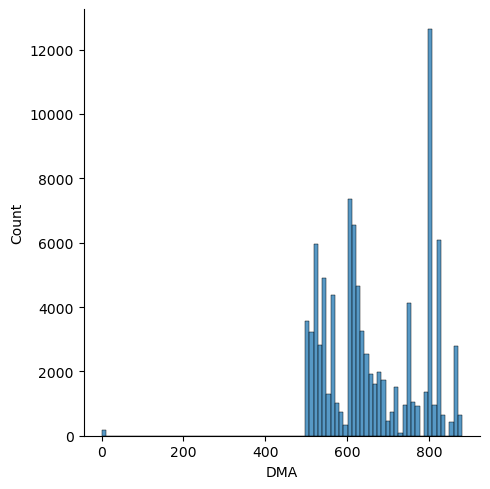

In [198]:
sns.displot(numerical['DMA']) 
plt.show()

In [200]:
numerical["NEXTDATE"].value_counts(dropna=False)

# NEXTDATE Date of second gift

NEXTDATE
NaN       9973
9504.0    2253
9412.0    1970
8703.0    1959
9512.0    1870
          ... 
8107.0       1
7408.0       1
8207.0       1
8104.0       1
8412.0       1
Name: count, Length: 189, dtype: int64

In [201]:
numerical["NEXTDATE"].sort_values().unique()

array([7211., 7401., 7403., 7408., 7703., 7705., 7711., 7804., 7809.,
       7810., 7907., 7910., 8005., 8011., 8012., 8104., 8105., 8107.,
       8110., 8111., 8112., 8203., 8204., 8205., 8207., 8208., 8211.,
       8212., 8303., 8304., 8306., 8307., 8309., 8401., 8402., 8403.,
       8405., 8406., 8407., 8408., 8409., 8410., 8411., 8412., 8501.,
       8502., 8505., 8506., 8507., 8508., 8509., 8510., 8511., 8512.,
       8601., 8602., 8603., 8604., 8605., 8606., 8607., 8608., 8609.,
       8610., 8611., 8612., 8701., 8702., 8703., 8704., 8705., 8706.,
       8707., 8708., 8709., 8710., 8711., 8712., 8801., 8802., 8803.,
       8804., 8805., 8806., 8807., 8808., 8809., 8810., 8811., 8812.,
       8901., 8902., 8903., 8904., 8905., 8906., 8907., 8908., 8909.,
       8910., 8911., 8912., 9001., 9002., 9003., 9004., 9005., 9006.,
       9007., 9008., 9009., 9010., 9011., 9012., 9101., 9102., 9103.,
       9104., 9105., 9106., 9107., 9108., 9109., 9110., 9111., 9112.,
       9201., 9202.,

In [ ]:
# As we are considering all features with the latest date of donation, and all nan in this column are around 10% of all values,
# I am deciding to drop this column. 

In [204]:
numerical = numerical.drop(['NEXTDATE'], axis=1) 

In [212]:
df_n = pd.DataFrame(numerical.isna().sum()).reset_index()
df_n.columns = ['column_name', 'nulls']
df_n[df_n['nulls']>0]

,column_name,nulls


In [213]:
numerical.to_csv('numerical_clean.csv', index=False)